# RC RCL Lab

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
df = pd.read_csv("data/RC and RLC Circuits Data.csv")
df

,1a t,1a V,1c t,1c V,2a t,2a V,2b t,2b V
0,0.000,9.80,0.000,0.360,0.000172,0.182300,0.0208,3.86
1,0.028,9.32,0.112,0.396,0.000812,0.102500,0.0768,3.46
2,0.068,8.68,0.192,0.416,0.001470,0.057480,0.1330,3.18
3,0.168,7.40,0.332,0.436,0.002110,0.033270,0.1890,2.90
4,0.208,6.92,0.632,0.484,0.002770,0.019480,0.2770,2.50
5,0.328,5.72,1.230,0.532,0.003410,0.011550,0.3890,2.10
6,0.508,4.36,2.050,0.584,0.004070,0.007434,0.5410,1.66
7,0.868,2.68,2.850,0.612,0.004730,0.004547,0.7570,1.18
8,1.290,1.56,3.390,0.640,NaN,NaN,0.9970,0.86
9,1.850,0.76,4.130,0.664,NaN,NaN,1.2200,0.62


In [7]:
df_1a = df[["1a t", "1a V"]]
df_1a

,1a t,1a V
0,0.000,9.80
1,0.028,9.32
2,0.068,8.68
3,0.168,7.40
4,0.208,6.92
5,0.328,5.72
6,0.508,4.36
7,0.868,2.68
8,1.290,1.56
9,1.850,0.76


Text(0.5, 1.0, 'Voltage vs Time for 1a')

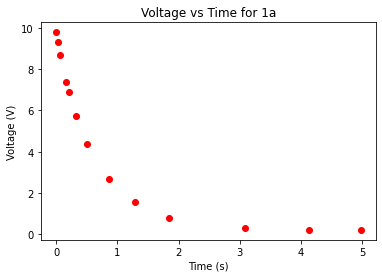

In [14]:
plt.scatter(df_1a["1a t"], df_1a["1a V"], color="red")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time for 1a")

In [32]:
# the discharge function to find tau for 1a
def discharge_func_to_fit(t, v0, tau):
    return v0 * np.exp(-t / tau)

In [33]:
params, cov = curve_fit(discharge_func_to_fit, df_1a["1a t"], df_1a["1a V"])
std_errs = np.sqrt(np.diag(cov))
print("params" + str(params))
print("std_errs" + str(std_errs))

params[9.63917118 0.66106248]
std_errs[0.09058506 0.01782095]


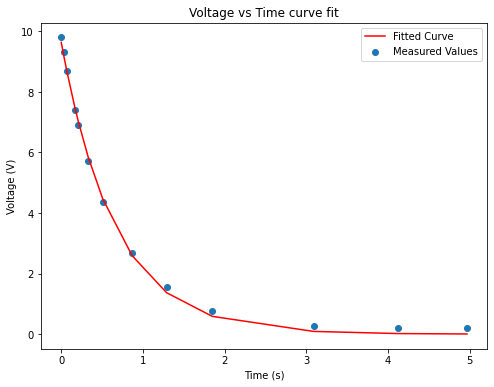

v0 = 9.639171177563526 +/- 0.09058506451905952
tau = 0.6610624806562464 +/- 0.017820949693027176


In [34]:
ypred = discharge_func_to_fit(df_1a["1a t"], *params)

plt.figure(figsize=(8,6))
plt.scatter(df_1a["1a t"], df_1a["1a V"], label="Measured Values")
plt.plot(df_1a["1a t"], ypred, 'r-', label="Fitted Curve")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time curve fit")
plt.show()
print("v0 = " + str(params[0]) + " +/- " + str(std_errs[0]))
print("tau = " + str(params[1]) + " +/- " + str(std_errs[1]))

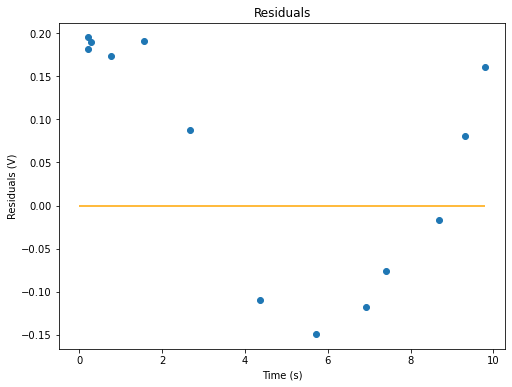

In [35]:
# residuals
residuals = df_1a["1a V"] - ypred
plt.figure(figsize=(8,6))
plt.scatter(df_1a["1a V"], residuals)
plt.xlabel("Time (s)")
plt.ylabel("Residuals (V)")
plt.title("Residuals")
plt.hlines(0, 0, df_1a["1a V"].max(), color="orange")
plt.show()

# Part 1c

In [46]:
df_1c = df[["1c t", "1c V"]].dropna()
df_1c

,1c t,1c V
0,0.000,0.360
1,0.112,0.396
2,0.192,0.416
3,0.332,0.436
4,0.632,0.484
5,1.230,0.532
6,2.050,0.584
7,2.850,0.612
8,3.390,0.640
9,4.130,0.664


Text(0.5, 1.0, 'Voltage vs Time for 1c charging curve')

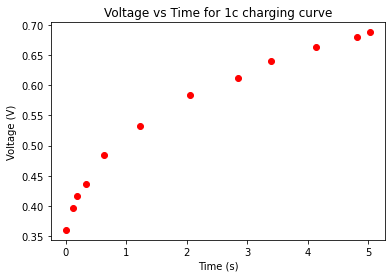

In [47]:
plt.scatter(df_1c["1c t"], df_1c["1c V"], color="red")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time for 1c charging curve")

In [59]:
# the discharge function to find tau for 1c
def charge_func_to_fit(t, v0, tau, c):
    return v0 * (1 - np.exp(-t / tau)) + c

In [60]:
params2, cov2 = curve_fit(charge_func_to_fit, df_1c["1c t"], df_1c["1c V"])
std_errs2 = np.sqrt(np.diag(cov2))
print("params" + str(params2))
print("std_errs" + str(std_errs2))

params[0.32532949 1.97579729 0.37889474]
std_errs[0.01304332 0.24144309 0.00675045]


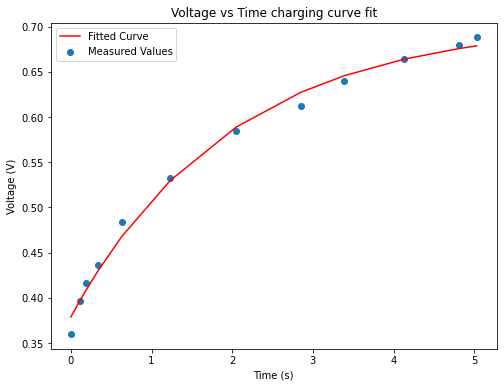

v0 = 0.32532948904866943 +/- 0.013043318684880319
tau = 1.9757972928099397 +/- 0.2414430898355643
c = 0.3788947359133068 +/- 0.006750447363530157


In [63]:
ypred2 = charge_func_to_fit(df_1c["1c t"], *params2)

plt.figure(figsize=(8,6))
plt.scatter(df_1c["1c t"], df_1c["1c V"], label="Measured Values")
plt.plot(df_1c["1c t"], ypred2, 'r-', label="Fitted Curve")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time charging curve fit")
plt.show()
print("v0 = " + str(params2[0]) + " +/- " + str(std_errs2[0]))
print("tau = " + str(params2[1]) + " +/- " + str(std_errs2[1]))
print("c = " + str(params2[2]) + " +/- " + str(std_errs2[2]))

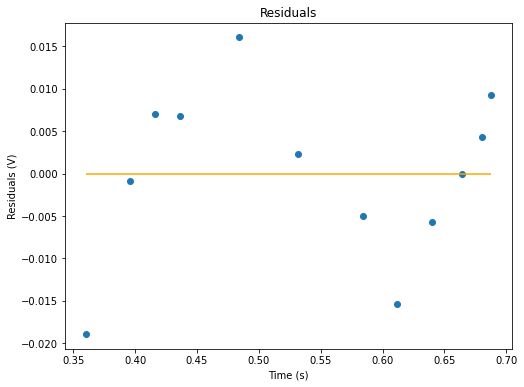

In [67]:
# residuals
residuals2 = df_1c["1c V"] - ypred2
plt.figure(figsize=(8,6))
plt.scatter(df_1c["1c V"], residuals2)
plt.xlabel("Time (s)")
plt.ylabel("Residuals (V)")
plt.title("Residuals")
plt.hlines(0, df_1c["1c V"].min(), df_1c["1c V"].max(), color="orange")
plt.show()

In [68]:
tau = params2[1]
a_tau = std_errs2[1]
R = 1000000
a_R = R * 0.01

In [69]:
tau/R

1.97579729280994e-06

In [77]:
np.sqrt(a_tau * (1/R)**2 + a_R**2 * (-1 * tau/R**2)**2)

4.917656630243635e-07

In [79]:
3.8*8.854*10**(-12)*(0.06032246/0.0001)

2.0295612311919996e-09